In [1]:
!pip3 install opencv-python

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn 
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
path=r"C:\Users\dell\Downloads\Flower Recognition Project\archive\merged"
Image_size = 250
Batch_size = 64
Channels=3
EPOCHS = 20
n_classes=11
train_size = 0.85

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training dataset with data augmentation
train_dataset_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    shuffle=True,
    validation_split=0.15,
    subset="training",
    seed=123,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size,
)

# Validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    shuffle=True,
    validation_split=0.15,
    subset="validation",
    seed=123,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size,
)

# Cache, shuffle, and prefetch the datasets
train_ds = train_dataset_augmented.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Found 6857 files belonging to 99 classes.
Using 5829 files for training.
Found 6857 files belonging to 99 classes.
Using 1028 files for validation.


In [5]:
class_names = train_dataset_augmented.class_names
print("Class Names:", class_names)

Class Names: ['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orange dah

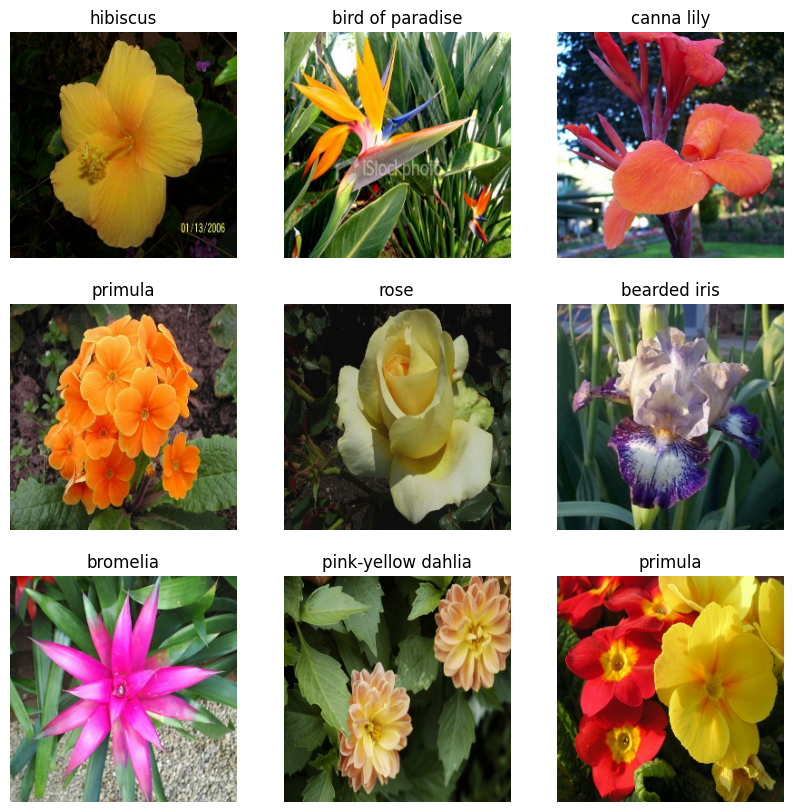

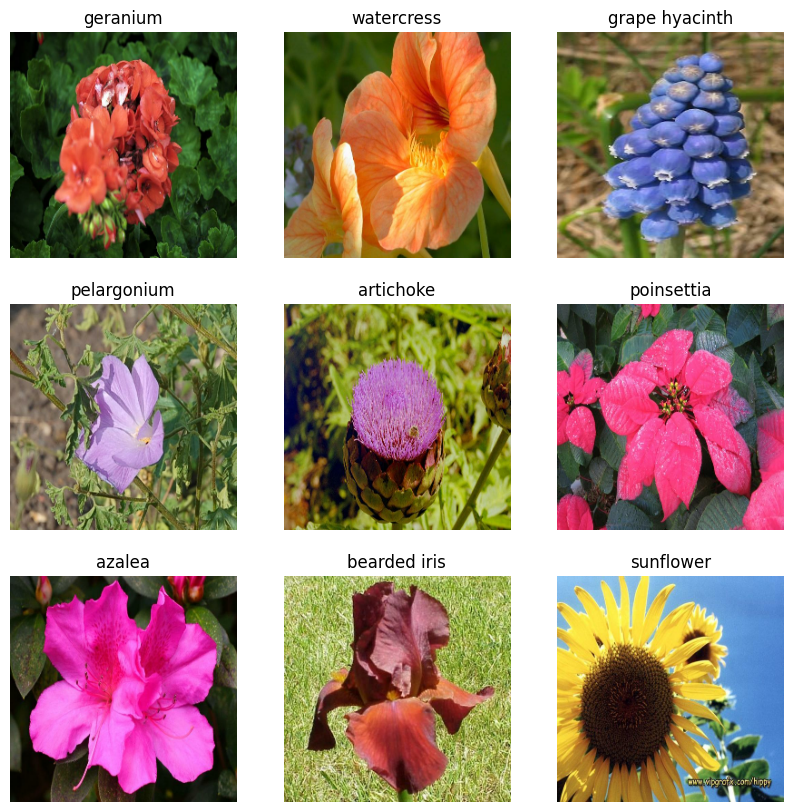

In [6]:
# Convert the generator to an iterator
train_dataset_augmented_iter = iter(train_dataset_augmented)

# Get a batch of images and labels
images, labels = next(train_dataset_augmented_iter)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i in range(min(9, images.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

plt.show()

# Get another batch of images and labels
images, labels = next(train_dataset_augmented_iter)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i in range(min(9, images.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create your model
model = Sequential()

model.add(Resizing(Image_size, Image_size))
model.add(Rescaling(1.0 / Image_size)) 

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(Image_size, Image_size, Channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(n_classes, activation='softmax'))

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [9]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_ds,epochs=EPOCHS,batch_size=Batch_size,verbose=1,validation_data=val_ds,callbacks=[early_stopping])

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 639, in run_forever

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1985, in _run_once

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\dell\AppData\Local\Temp\ipykernel_13164\3602917836.py", line 4, in <module>

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 323, in fit

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 105, in one_step_on_data

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 59, in train_step

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 321, in compute_loss

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 606, in __call__

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 642, in call

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 1714, in sparse_categorical_crossentropy

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py", line 1541, in sparse_categorical_crossentropy

  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 633, in sparse_categorical_crossentropy

Received a label value of 96 which is outside the valid range of [0, 11).  Label values: 79 53 9 66 7 88 29 61 60 23 49 29 32 17 17 8 48 95 69 26 6 29 93 12 95 25 10 34 94 71 76 3 24 47 40 24 13 76 96 56 3 81 46 19 96 49 21 59 78 61 12 16 86 21 84 80 75 9 10 30 87 51 43 29
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_2734]

In [ ]:
from tensorflow.keras.models import load_model
import keras
model.save('MyModel4.h5') 
# load model 
savedModel=load_model('MyModel4.h5')

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

NameError: name 'history' is not defined

NameError: name 'acc' is not defined

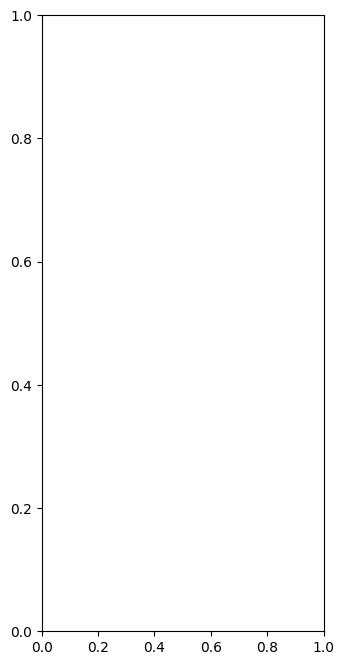

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
epochs_range = range(len(acc))  # Use the correct length
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from math import floor
savedModel=load_model('MyModel4.h5')
img_paths = ['./test15\\lotus.jpeg' ]

# For showing the image
for img_path in img_paths:
    test_image = image.load_img(img_path, target_size=(250, 250))
    plt.figure(figsize=(3, 3))
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()

    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Result array
    result = savedModel.predict(test_image)

    # Mapping result array with the main name list
    predicted_class_index = np.argmax(result)
    predicted_class = class_names[predicted_class_index]

    # Get confidence level
    confidence_level = result[0][predicted_class_index]

    print("Predicted to be a:", predicted_class)
    print(f"Confidence level: {floor(confidence_level*100)}%")

FileNotFoundError: [Errno 2] No such file or directory: './test15\\lotus.jpeg'

In [ ]:
from colabcode import ColabCode
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from fastapi import FastAPI, UploadFile, File, HTTPException, Depends
from fastapi.middleware.cors import CORSMiddleware
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!ngrok authtoken 2cNVnDEt0N2Cyhe07s7wvLZcH7H_4BeSM2pxWXtvgqxePsfzs

Authtoken saved to configuration file: C:\Users\madhu\AppData\Local/ngrok/ngrok.yml


In [ ]:
from tensorflow.keras.models import load_model

# Provide the path to your saved model file
model_path = "./MyModel4.h5"

# Load the model
MODEL = load_model(model_path)

In [ ]:
cc = ColabCode(port=12000, code=False)

CLASS_NAMES = ['balloon flower', 'bishop of llandaff', 'black-eyed susan', 'cape flower', 'foxglove', 'geranium', 'lotus lotus', 'moon orchid', 'oxeye daisy', 'sunflower']

app = FastAPI()

def get_model():
    return MODEL

# Use the CORS middleware to allow all origins, methods, and headers
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.get("/")
async def read():
    return "I am live"

def read_file_as_image(data) -> np.ndarray:
    try:
        image = Image.open(BytesIO(data))
        # Resize the image to match the expected input shape (240, 240)
        image = image.resize((250, 250))
        image = np.array(image)
        return image
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Error reading image: {str(e)}")

@app.post("/predict")
async def predict(
    file: UploadFile = File(..., content_type="image/jpeg"),
    model: tf.keras.Model = Depends(get_model)
):
    try:
        image = read_file_as_image(await file.read())
        image_batch = np.expand_dims(image, 0)
        prediction = model.predict(image_batch)
        predicted_class = CLASS_NAMES[np.argmax(prediction[0])]
        confidence = float(np.max(prediction[0]))
        return {
            "class": predicted_class,
            "confidence": confidence
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction error: {str(e)}")
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://f65e-103-246-171-254.ngrok-free.app" -> "http://localhost:12000"


INFO:     Started server process [29200]
INFO:uvicorn.error:Started server process [29200]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


INFO:     103.246.171.254:0 - "GET / HTTP/1.1" 200 OK
INFO:     103.246.171.254:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     103.246.171.254:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     103.246.171.254:0 - "GET /openapi.json HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
INFO:     103.246.171.254:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
INFO:     1

INFO:     Shutting down
INFO:uvicorn.error:Shutting down
INFO:     Waiting for application shutdown.
INFO:uvicorn.error:Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:uvicorn.error:Application shutdown complete.
INFO:     Finished server process [29200]
INFO:uvicorn.error:Finished server process [29200]
